In [25]:
import numpy as np
import pandas as pd
import time as time
import matplotlib.pyplot as plt

In [26]:
# Function to generate the dataset with the arrays 
def generate_datasets():
    dataset = []
    sizes = [1000,10000,100000,1000000,2000000,\
             3000000,4000000,5000000,10000000] #size of the arrays
    
    for size in sizes:
        dataset.append(np.random.randint(1, size + 1, size))
    return dataset

datasets = generate_datasets()
datasets

[array([807, 794, 886, 978, 959, 636, 459, 886, 831,  83, 847, 626, 246,
        395, 924, 137, 390, 841, 174, 934, 787, 419, 193, 227, 966, 202,
        816,   8, 180, 945, 133, 493, 213, 603, 705, 811, 766, 928, 211,
        812, 169, 836, 292, 569,  17, 908, 390,  47, 624, 344, 821, 804,
        215, 274, 772, 895, 662, 753, 217, 127, 210, 521, 565, 605, 820,
        593, 392, 406, 265, 888, 489, 116, 815, 111, 174, 917, 678, 657,
        878, 660, 249, 739, 638,  30, 180, 305, 247, 550, 961, 543, 336,
        109, 774, 671, 371, 874, 374, 547,  68, 941, 860, 657, 753, 186,
        791, 237,  49, 729, 468, 178,  58,  55, 677, 650, 492, 270, 740,
        630, 933, 688, 460, 576, 589, 458, 331, 315, 807, 796, 891,   6,
        796, 298, 706,  46, 539, 777, 160, 224, 917, 163, 656, 581, 947,
        345, 333, 233, 474, 326, 391, 780, 856, 918, 868,  11, 248, 212,
        248, 245, 377, 788, 386, 604, 386, 368, 442, 810, 443, 433, 955,
        327, 374, 934, 310, 571, 287, 279,  68, 983

In [27]:
#Overall hybrid sort code

def insertion_sort(arr):
    n = len(arr)
    comparison_count = 0
    
    if n > 1: 
        for i in range(1, n):
            for j in range(i, 0, -1):
                comparison_count += 1
                
                if arr[j] < arr[j-1]:
                    arr[j], arr[j-1] = arr[j-1], arr[j]
                else:
                    break
    return arr, comparison_count

def merge(arr, mid):
    global keyComp_merge
    
    # Split array into left and right halves using slicing
    left_half = arr[:mid]
    right_half = arr[mid:]
    
    i = j = 0  # Pointers for left and right halves
    temp = []  # Use an empty list for temporary storage
    
    # Merge the two halves
    while i < len(left_half) and j < len(right_half):
        keyComp_merge += 1
        if left_half[i] <= right_half[j]:
            temp.append(left_half[i])  # Append the smaller element to temp
            i += 1
        else:
            temp.append(right_half[j])
            j += 1
    
    # Append any remaining elements from left_half
    temp.extend(left_half[i:])
    
    # Append any remaining elements from right_half
    temp.extend(right_half[j:])
    
    # Copy the sorted elements back to the original array
    arr[:] = temp[:]


def hybrid_sort(arr, s):
    global keyComp_insert

    # Base case: Use insertion sort for small arrays
    if len(arr) <= s:
        sorted_array, comp = insertion_sort(arr)
        arr[:] = sorted_array
        keyComp_insert += comp
        return arr
    else:
        mid = len(arr) // 2
        # Recursively apply hybrid_sort to the left and right halves
        hybrid_sort(arr[:mid], s)
        hybrid_sort(arr[mid:], s)
        # Merge the two sorted halves
        merge(arr, mid)
        return arr

In [28]:
#Creating the list of s values
thresholdSize_list = list(range(1,101))

In [29]:
#For n= 1k
results_1k = list()

for s in thresholdSize_list:

    keyComp_insert = 0
    keyComp_merge = 0 
    start_time = time.time()

    sorted_array_hybrid = hybrid_sort(datasets[0].copy(),s) 
    
    end_time= time.time()
    elapsed_time = end_time - start_time
    keyComp_hybrid = keyComp_insert + keyComp_merge
    
    results_1k.append({'s-value': s,
                         'runtime': elapsed_time,
                         'keyComp': keyComp_hybrid
                             })
    
df_1k = pd.DataFrame(results_1k)
df_1k.to_csv('results_1k.csv',index = False)

df_1k

,s-value,runtime,keyComp
0,1,0.007040,8683
1,2,0.006002,8683
2,3,0.005041,8682
3,4,0.004017,8748
4,5,0.004019,8748
...,...,...,...
95,96,0.008002,21034
96,97,0.008003,21034
97,98,0.007002,21034
98,99,0.007505,21034


In [30]:
#For n= 10k
results_10k = list()

for s in thresholdSize_list:

    keyComp_insert = 0
    keyComp_merge = 0 
    start_time = time.time()

    sorted_array_hybrid = hybrid_sort(datasets[1].copy(),s) 
    
    end_time= time.time()
    elapsed_time = end_time - start_time
    keyComp_hybrid = keyComp_insert + keyComp_merge
    
    results_10k.append({'s-value': s,
                         'runtime': elapsed_time,
                         'keyComp': keyComp_hybrid
                             })
    
df_10k = pd.DataFrame(results_10k)
df_10k.to_csv('results_10k.csv',index = False)

df_10k

,s-value,runtime,keyComp
0,1,0.087340,120454
1,2,0.068322,120454
2,3,0.060553,120428
3,4,0.059519,120476
4,5,0.053012,121493
...,...,...,...
95,96,0.100608,273412
96,97,0.102159,273412
97,98,0.104822,273412
98,99,0.101527,273412


In [31]:
#For n = 100k
results_100k = list()

for s in thresholdSize_list:

    keyComp_insert = 0
    keyComp_merge = 0 
    start_time = time.time()

    sorted_array_hybrid = hybrid_sort(datasets[2].copy(),s) 
    
    end_time= time.time()
    elapsed_time = end_time - start_time
    keyComp_hybrid = keyComp_insert + keyComp_merge
    
    results_100k.append({'s-value': s,
                         'runtime': elapsed_time,
                         'keyComp': keyComp_hybrid
                             })
    
df_100k = pd.DataFrame(results_100k)
df_100k.to_csv('results_100k.csv',index = False)

df_100k

,s-value,runtime,keyComp
0,1,0.910150,1536349
1,2,0.821226,1536349
2,3,0.728824,1536238
3,4,0.752754,1536680
4,5,0.719762,1536680
...,...,...,...
95,96,0.921417,2383388
96,97,1.068047,2771584
97,98,1.393944,3520649
98,99,1.379014,3520649


In [32]:
#For n = 1m
results_1m = list()

for s in thresholdSize_list:

    keyComp_insert = 0
    keyComp_merge = 0 
    start_time = time.time()

    sorted_array_hybrid = hybrid_sort(datasets[3].copy(),s) 
    
    end_time= time.time()
    elapsed_time = end_time - start_time
    keyComp_hybrid = keyComp_insert + keyComp_merge
    
    results_1m.append({'s-value': s,
                         'runtime': elapsed_time,
                         'keyComp': keyComp_hybrid
                             })
    
df_1m = pd.DataFrame(results_1m)
df_1m.to_csv('results_1m.csv',index = False)

df_1m

,s-value,runtime,keyComp
0,1,10.609592,18674435
1,2,9.628610,18674435
2,3,9.073071,18674327
3,4,8.565322,18727562
4,5,8.307081,18727562
...,...,...,...
95,96,11.510051,29901256
96,97,11.469027,29901256
97,98,11.441345,29901256
98,99,11.459858,29901256


In [33]:
#For n = 2m
results_2m = list()

for s in thresholdSize_list:

    keyComp_insert = 0
    keyComp_merge = 0 
    start_time = time.time()

    sorted_array_hybrid = hybrid_sort(datasets[4].copy(),s) 
    
    end_time= time.time()
    elapsed_time = end_time - start_time
    keyComp_hybrid = keyComp_insert + keyComp_merge
    
    results_2m.append({'s-value': s,
                         'runtime': elapsed_time,
                         'keyComp': keyComp_hybrid
                             })
    
df_2m = pd.DataFrame(results_2m)
df_2m.to_csv('results_2m.csv',index = False)

df_2m

,s-value,runtime,keyComp
0,1,21.607354,39348305
1,2,19.122515,39348305
2,3,18.762714,39348234
3,4,17.538061,39455796
4,5,17.472043,39455796
...,...,...,...
95,96,23.814746,61803304
96,97,23.769770,61803304
97,98,23.558015,61803304
98,99,23.513689,61803304


In [34]:
#For n = 3m
results_3m = list()

for s in thresholdSize_list:

    keyComp_insert = 0
    keyComp_merge = 0 
    start_time = time.time()

    sorted_array_hybrid = hybrid_sort(datasets[5].copy(),s) 
    
    end_time= time.time()
    elapsed_time = end_time - start_time
    keyComp_hybrid = keyComp_insert + keyComp_merge
    
    results_3m.append({'s-value': s,
                         'runtime': elapsed_time,
                         'keyComp': keyComp_hybrid
                             })
    
df_3m = pd.DataFrame(results_3m)
df_3m.to_csv('results_3m.csv',index = False)

df_3m

,s-value,runtime,keyComp
0,1,33.520265,60820795
1,2,30.307053,60820795
2,3,27.829384,60820537
3,4,27.810108,60820537
4,5,27.279595,60900867
...,...,...,...
95,96,43.786423,115662190
96,97,43.906524,115662190
97,98,44.340264,115662190
98,99,44.170104,115662190


In [35]:
#For n = 4m
results_4m = list()

for s in thresholdSize_list:

    keyComp_insert = 0
    keyComp_merge = 0 
    start_time = time.time()

    sorted_array_hybrid = hybrid_sort(datasets[6].copy(),s) 
    
    end_time= time.time()
    elapsed_time = end_time - start_time
    keyComp_hybrid = keyComp_insert + keyComp_merge
    
    results_4m.append({'s-value': s,
                         'runtime': elapsed_time,
                         'keyComp': keyComp_hybrid
                             })
    
df_4m = pd.DataFrame(results_4m)
df_4m.to_csv('results_4m.csv',index = False)

df_4m

,s-value,runtime,keyComp
0,1,44.693414,82696383
1,2,40.132891,82696383
2,3,39.644451,82696299
3,4,36.521088,82909515
4,5,36.543841,82909515
...,...,...,...
95,96,49.574501,127586244
96,97,49.074034,127586244
97,98,48.715276,127586244
98,99,48.586415,127586244


In [36]:
#For n = 5m
results_5m = list()

for s in thresholdSize_list:

    keyComp_insert = 0
    keyComp_merge = 0 
    start_time = time.time()

    sorted_array_hybrid = hybrid_sort(datasets[7].copy(),s) 
    
    end_time= time.time()
    elapsed_time = end_time - start_time
    keyComp_hybrid = keyComp_insert + keyComp_merge
    
    results_5m.append({'s-value': s,
                         'runtime': elapsed_time,
                         'keyComp': keyComp_hybrid
                             })
    
df_5m = pd.DataFrame(results_5m)
df_5m.to_csv('results_5m.csv',index = False)

df_5m

,s-value,runtime,keyComp
0,1,56.736987,105049526
1,2,51.610486,105049526
2,3,49.044613,105049198
3,4,48.218367,105110011
4,5,46.007808,105552600
...,...,...,...
95,96,67.939711,178668990
96,97,68.487355,178668990
97,98,69.304792,178668990
98,99,71.143449,178668990


In [37]:
#For n = 10m
results_10m = list()

for s in thresholdSize_list:

    keyComp_insert = 0
    keyComp_merge = 0 
    start_time = time.time()

    sorted_array_hybrid = hybrid_sort(datasets[8].copy(),s) 
    
    end_time= time.time()
    elapsed_time = end_time - start_time
    keyComp_hybrid = keyComp_insert + keyComp_merge
    
    results_10m.append({'s-value': s,
                         'runtime': elapsed_time,
                         'keyComp': keyComp_hybrid
                             })
    
df_10m = pd.DataFrame(results_10m)
df_10m.to_csv('results_10m.csv',index = False)

df_10m

,s-value,runtime,keyComp
0,1,118.407136,220101763
1,2,107.991110,220101763
2,3,102.043516,220101710
3,4,100.616312,220222411
4,5,95.573649,221109961
...,...,...,...
95,96,140.895954,367344521
96,97,140.974432,367344521
97,98,141.786846,367344521
98,99,141.087326,367344521


Text(0, 0.5, 'Time taken')

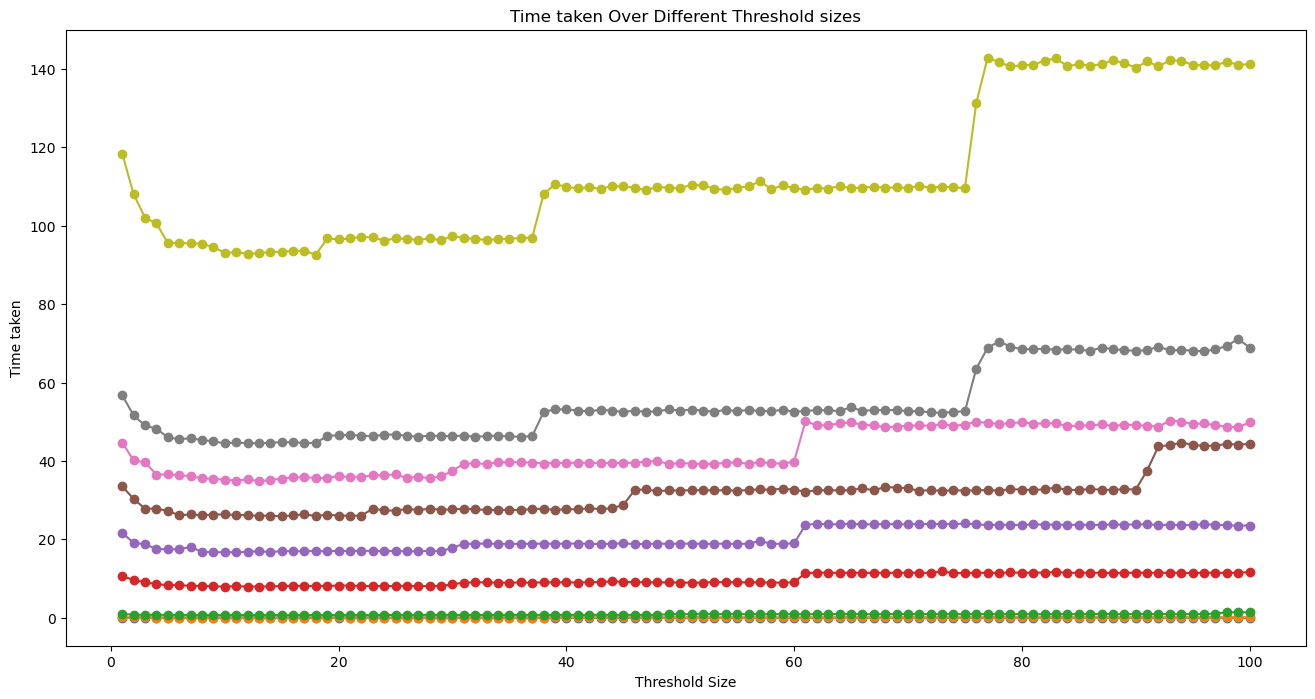

In [67]:
plt.figure(figsize=(16,8))

plt.plot(df_1k['s-value'], df_1k['runtime'], marker='o') 
plt.plot(df_10k['s-value'], df_10k['runtime'], marker='o') 
plt.plot(df_100k['s-value'], df_100k['runtime'], marker='o') 
plt.plot(df_1m['s-value'], df_1m['runtime'], marker='o')

plt.plot(df_2m['s-value'], df_2m['runtime'], marker='o') 
plt.plot(df_3m['s-value'], df_3m['runtime'], marker='o') 
plt.plot(df_4m['s-value'], df_4m['runtime'], marker='o') 
plt.plot(df_5m['s-value'], df_5m['runtime'], marker='o')
plt.plot(df_10m['s-value'], df_10m['runtime'], marker='o') 

plt.title("Time taken Over Different Threshold sizes") 
plt.xlabel("Threshold Size") 
plt.ylabel("Time taken")

In [38]:
#Hybrid sort on different array sizes and fixed threshold s

results_fixed_s = list()

s = 10

for dataset in datasets:
    keyComp_merge = 0
    keyComp_insert = 0
    start_time = time.time()

    sorted_array_hybrid = hybrid_sort(dataset.copy(), s)

    end_time= time.time()
    elapsed_time = end_time - start_time
    keyComp_hybrid = keyComp_insert + keyComp_merge

    results_fixed_s.append({'dataset_size': dataset.size,
                            'runtime': elapsed_time,
                            'keyComp': keyComp_hybrid
                                })


df_fixed_s = pd.DataFrame(results_fixed_s)
df_fixed_s.to_csv('results_fixed_s.csv',index = False)


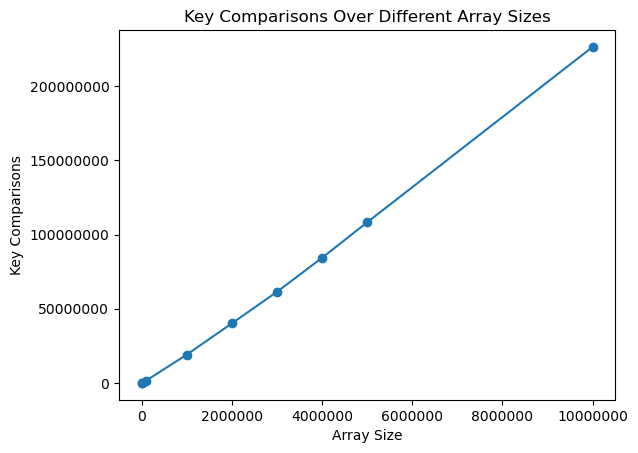

In [69]:
# With the value of S fixed, plot the number of key comparisons over different sizes of the input list n. 

plt.title("Key Comparisons Over Different Array Sizes") 
plt.xlabel("Array Size") 
plt.ylabel("Key Comparisons")
plt.ticklabel_format(axis="y", style="plain")
plt.ticklabel_format(axis="x", style="plain")

#for xy in zip(df_fixed_s.dataset_size, df_fixed_s.keyComp): #show points
   #plt.annotate('(%d, %d)' % xy, xy=xy)

plt.plot(df_fixed_s.dataset_size, df_fixed_s.keyComp, marker = 'o')

0     0.004336
1     0.053089
2     0.661387
3     7.907523
4    16.759583
5    26.177042
6    35.120235
7    44.553695
8    93.324746
Name: runtime, dtype: float64


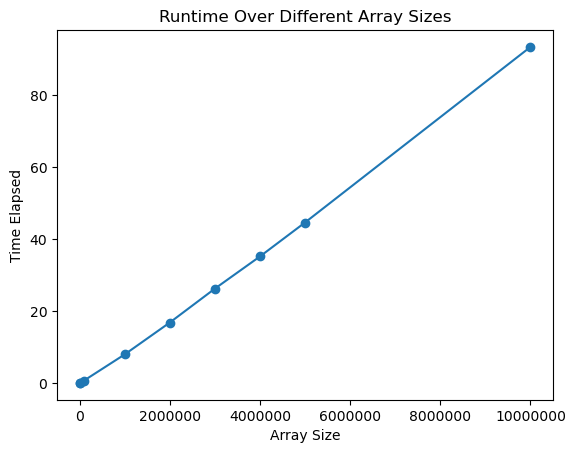

In [68]:

# With the value of S fixed, plot the runtime over different sizes of the input list n. 

plt.title("Runtime Over Different Array Sizes") 
plt.xlabel("Array Size") 
plt.ylabel("Time Elapsed")
plt.ticklabel_format(axis="y", style="plain")
plt.ticklabel_format(axis="x", style="plain")

#for xy in zip(df_fixed_s.dataset_size, df_fixed_s.runtime): #show points
   #plt.annotate('(%d, %d)' % xy, xy=xy)

plt.plot(df_fixed_s.dataset_size, df_fixed_s.runtime, marker = 'o')
print(df_fixed_s.runtime)